In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from scipy.stats import bernoulli

import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D , Dense, Dropout, Flatten, Lambda, ELU, MaxPooling2D , ReLU , MaxPool2D
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam


import argparse
import base64
from datetime import datetime
import os
import shutil
import math
import cv2
import numpy as np
import socketio
import eventlet
import eventlet.wsgi
from PIL import Image
from flask import Flask
from io import BytesIO
import matplotlib.pyplot as plt

from keras.models import load_model
import h5py
from keras import __version__ as keras_version



In [2]:
MIDUS2DATAFILE = 'MIDUS_2_DATA.tsv' # second interval datatset file 
MIDUS1DATAFILE = 'MIDUS_1_DATA.tsv' # first interval datatset file 
MIDUS_2_Data = pd.read_csv(MIDUS2DATAFILE, sep='\t') # read the second interval data
MIDUS_1_Data = pd.read_csv(MIDUS1DATAFILE, sep='\t')#  read the first interval data
MIDUS_1_Data

,M2ID,M2FAMNUM,SAMPLMAJ,A1STATUS,A1PAGE_M2,A1PRAGE_2019,M1AGE_FLAG,A1PBYEAR,A1PBYEAR_2019,M1BYEAR_FLAG,...,A1SS15_8,A1SS15_9,A1SS15_10,A1SS16,A1SS17,A1ST1,A1ST2,A1ST3,A1ST4,A1ST5
0,10001,110498,2,2,53,53,0,1943,1943,0,...,8,8,8,4,4,8,5,8,8,8
1,10002,100001,1,1,60,60,0,1935,1935,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,10004,100002,1,2,69,69,0,1925,1925,0,...,9,9,9,9,9,8,7,8,8,8
3,10005,120803,3,2,70,70,0,1924,1924,0,...,9,9,9,9,9,10,10,10,10,10
4,10006,120772,3,2,51,51,0,1944,1944,0,...,9,9,9,9,9,6,4,8,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,19188,120285,3,2,42,42,0,1952,1952,0,...,9,9,9,9,9,7,9,9,8,7
7104,19189,103713,1,1,98,61,3,9998,1933,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7105,19190,110528,1,2,35,35,0,1960,1960,0,...,9,9,9,9,9,9,8,9,9,9
7106,19191,120390,3,2,35,35,0,1960,1960,0,...,2,1,2,4,4,10,10,10,10,10


In [3]:
MIDUS_2_Data

,M2ID,M2FAMNUM,SAMPLMAJ,B1STATUS,B1PAGE_M2,B1PRAGE_2019,M2AGE_FLAG,B1PBYEAR,B1PBYEAR_2019,M2BYEAR_FLAG,...,B1SP3I,B1SP3J,B1SP4,B1SP5,B1SQ1,B1SQ2,B1SQ3,B1SQ4,B1SQ5,B1SQ6
0,10001,110498,2,2,61,61,0,1943,1943,0,...,8,8,8,8,8,5,7,8,8,8
1,10002,100001,1,2,69,69,0,1935,1935,0,...,8,8,8,8,9,9,9,7,6,10
2,10005,120803,3,2,80,80,0,1924,1924,0,...,8,8,8,8,10,10,10,10,10,10
3,10006,120772,3,1,60,60,0,1944,1944,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,10010,120378,3,2,55,55,0,1948,1948,0,...,2,2,3,3,8,8,8,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,19186,120914,3,1,66,66,0,1938,1938,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4959,19187,103712,4,1,55,55,0,1950,1950,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4960,19190,110528,1,2,44,44,0,1960,1960,0,...,8,8,8,8,9,9,9,9,9,9
4961,19191,120390,3,1,43,43,0,1960,1960,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
print(MIDUS_1_Data['A1PDEPDX'].unique())
print(MIDUS_2_Data['B1PDEPDX'].unique())

[0 1]
[0 1]


In [5]:
'''
merge both first and second interval , we only interested in people who made both survays 
first interval 1995-1996
second interval 2004-2006
'''
merged_data = pd.merge(MIDUS_1_Data , MIDUS_2_Data , on = "M2ID" , how="inner") 
merged_data

,M2ID,M2FAMNUM_x,SAMPLMAJ_x,A1STATUS,A1PAGE_M2,A1PRAGE_2019,M1AGE_FLAG,A1PBYEAR,A1PBYEAR_2019,M1BYEAR_FLAG,...,B1SP3I,B1SP3J,B1SP4,B1SP5,B1SQ1,B1SQ2,B1SQ3,B1SQ4,B1SQ5,B1SQ6
0,10001,110498,2,2,53,53,0,1943,1943,0,...,8,8,8,8,8,5,7,8,8,8
1,10002,100001,1,1,60,60,0,1935,1935,0,...,8,8,8,8,9,9,9,7,6,10
2,10005,120803,3,2,70,70,0,1924,1924,0,...,8,8,8,8,10,10,10,10,10,10
3,10006,120772,3,2,51,51,0,1944,1944,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,10010,120378,3,2,46,46,0,1948,1948,0,...,2,2,3,3,8,8,8,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,19186,120914,3,2,57,57,0,1938,1938,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4959,19187,103712,4,2,45,45,0,1950,1950,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4960,19190,110528,1,2,35,35,0,1960,1960,0,...,8,8,8,8,9,9,9,9,9,9
4961,19191,120390,3,2,35,35,0,1960,1960,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [6]:
variables = [
    'A1SPWBR', # Positive relations
    'B1SPWBR1', # Positive relations
    'A1SPWBS', # Self-acceptance
    'B1SPWBS1', # Self-acceptance
    'A1SPWBA', # Autonomy
    'B1SPWBA1', # Autonomy
    'A1SPWBG', # Personal growth
    'B1SPWBG1',# Personal growth
    'A1SPWBE',# Environmental mastery
    'B1SPWBE1',# Environmental mastery
    'A1SPWBU',# Purpose in life
    'B1SPWBU1',# Purpose in life
    'A1PDEPAD',# Depressed affect
    'B1PDEPAD',# Depressed affect
    'A1PDEPDX',# Depressed affect + anhedonia
    'B1PDEPDX',# Depressed affect + anhedonia
    
    'A1PD1', # Satisfied with life at present
    'A1SF1C', # Some wander aimlessly, but not me
    'A1SF1D',# Demands of everyday life often get me down
    'A1SF1F', # Maintaining close relationships difficult
    'A1SF1I', # Good managing daily responsibilities
    'A1SF1K', # Life process of learning/changing/growth
    'A1SF1L', # Experience challenge how think important
    'A1SF1M', # Others describe me as giving/share time
    'A1SF1U', # Do just about anything I set my mind to
    'A1SF1X', # When really want something, find way
    'A1SF1Y', # Many things interfere with what I want do
    'A1SF1Z', # Whether I get what want is in own hands
    'A1SF3B', # Do what can to change for better
    'A1SF3P', # Know what I want out of life
    'A1SF3Q', # I live one day at a time
    'A1SF3T', # Helpful to set goals for near future
    'A1SF3W', # No use in thinking about past because nothing can be done
    'A1SF4A', # Outgoing describes you how well
    'A1SF4D', # Organized describes you how well
    'A1SF4Y', # Broad minded describes you how well
    'A1SF4Z', # Sympathetic describes you how well
    'A1SK10A', # Give spouse/partner emotional support (hours/month)
    'A1SK17A', # World is too complex for me
    'A1SK17F', # Feel close to others in community
    'A1SK17G', # Daily activities not worthwhile for community
    'A1SK17J', # People do not care about others problems
    'A1SK17M', # Society not improving for people like me
    'A1SK17N', # Believe people are kind
    'A1SK7I', # Serve on a jury if called
    'A1SK7Q', # Volunteer for social causes
    'A1SM13', # Rely on friends for help with problem
    'A1SM5', # Open up to family about worries
    
]

In [7]:
merged_data.drop(merged_data.columns.difference(variables), 1, inplace=True)

C:\Users\Ultriva\AppData\Local\Temp\ipykernel_7392\619482246.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged_data.drop(merged_data.columns.difference(variables), 1, inplace=True)


In [8]:
merged_data.head()

,A1PDEPAD,A1PDEPDX,A1PD1,A1SF1C,A1SF1D,A1SF1F,A1SF1I,A1SF1K,A1SF1L,A1SF1M,...,A1SM5,A1SM13,B1PDEPAD,B1PDEPDX,B1SPWBA1,B1SPWBE1,B1SPWBG1,B1SPWBR1,B1SPWBU1,B1SPWBS1
0,0,0,1,2,3,3,3,2,2,3,...,1,2,0,0,13.0,14.0,14.0,12.0,17.0,15.0
1,0,0,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,21.0,16.0,17.0,13.0,17.0,19.0
2,0,0,1,1,7,7,1,1,1,1,...,1,1,0,0,20.0,20.0,20.0,20.0,21.0,20.0
3,1,1,1,2,1,2,2,1,1,3,...,4,4,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0,0,2,2,1,2,1,1,1,1,...,4,1,0,0,18.0,16.0,16.0,12.0,9.0,15.0


In [9]:
features = [
    'A1PD1', # Satisfied with life at present
    'A1SF1C', # Some wander aimlessly, but not me
    'A1SF1D',# Demands of everyday life often get me down
    'A1SF1F', # Maintaining close relationships difficult
    'A1SF1I', # Good managing daily responsibilities
    'A1SF1K', # Life process of learning/changing/growth
    'A1SF1L', # Experience challenge how think important
    'A1SF1M', # Others describe me as giving/share time
    'A1SF1U', # Do just about anything I set my mind to
    'A1SF1X', # When really want something, find way
    'A1SF1Y', # Many things interfere with what I want do
    'A1SF1Z', # Whether I get what want is in own hands
    'A1SF3B', # Do what can to change for better
    'A1SF3P', # Know what I want out of life
    'A1SF3Q', # I live one day at a time
    'A1SF3T', # Helpful to set goals for near future
    'A1SF3W', # No use in thinking about past because nothing can be done
    'A1SF4A', # Outgoing describes you how well
    'A1SF4D', # Organized describes you how well
    'A1SF4Y', # Broad minded describes you how well
    'A1SF4Z', # Sympathetic describes you how well
    'A1SK10A', # Give spouse/partner emotional support (hours/month)
    'A1SK17A', # World is too complex for me
    'A1SK17F', # Feel close to others in community
    'A1SK17G', # Daily activities not worthwhile for community
    'A1SK17J', # People do not care about others problems
    'A1SK17M', # Society not improving for people like me
    'A1SK17N', # Believe people are kind
    'A1SK7I', # Serve on a jury if called
    'A1SK7Q', # Volunteer for social causes
    'A1SM13', # Rely on friends for help with problem
    'A1SM5', # Open up to family about worries
]

targets = [
    'A1SPWBR', # Positive relations
    'B1SPWBR1', # Positive relations
    'A1SPWBS', # Self-acceptance
    'B1SPWBS1', # Self-acceptance
    'A1SPWBA', # Autonomy
    'B1SPWBA1', # Autonomy
    'A1SPWBG', # Personal growth
    'B1SPWBG1',# Personal growth
    'A1SPWBE',# Environmental mastery
    'B1SPWBE1',# Environmental mastery
    'A1SPWBU',# Purpose in life
    'B1SPWBU1',# Purpose in life
    'A1PDEPAD',# Depressed affect
    'B1PDEPAD',# Depressed affect
    'A1PDEPDX',# Depressed affect + anhedonia
    'B1PDEPDX',# Depressed affect + anhedonia
]
well_being_target_future = [
    'B1SPWBR1', # Positive relations
    'B1SPWBS1', # Self-acceptance
    'B1SPWBA1', # Autonomy
    'B1SPWBG1',# Personal growth
    'B1SPWBE1',# Environmental mastery
    'B1SPWBU1',# Purpose in life
]
well_being_target_currnet = [
    'A1SPWBR', # Positive relations
    'A1SPWBS', # Self-acceptance
    'A1SPWBA', # Autonomy
    'A1SPWBG', # Personal growth
    'A1SPWBE',# Environmental mastery
    'A1SPWBU',# Purpose in life
]

In [10]:
delete_columns = well_being_target_future + features  + ['A1PDEPAD','B1PDEPAD','A1PDEPDX','B1PDEPDX',] # columsn that will be checked if it has a -1 value then the whole row will be deleted
for column_name in delete_columns  : 
    dropIndex = merged_data[( merged_data[column_name] == -1 ) ].index # get the indecies to be deleted from the data
    merged_data.drop(dropIndex , inplace=True) # drop the rows that contains -1 value in corresponding columns
    
    
merged_data['A1SK17J'].unique()

array([5, 7, 1, 6, 2, 8, 4, 3], dtype=int64)

In [11]:


from sklearn.preprocessing import MinMaxScaler
MinMaxScaler_Feature = {} # will hold the scaler object for each feature (to normalize user's input in real-time)
for feature in features:
    scaler = MinMaxScaler() # create a scaler to normalize the features (columns)
    scaler.fit(np.array(merged_data[feature]).reshape(-1,1)) # fir the scaler
    MinMaxScaler_Feature[feature] = scaler 
    merged_data[feature] = scaler.transform(np.array(merged_data[feature]).reshape(-1,1)) # normalize the column 

merged_data

,A1PDEPAD,A1PDEPDX,A1PD1,A1SF1C,A1SF1D,A1SF1F,A1SF1I,A1SF1K,A1SF1L,A1SF1M,...,A1SM5,A1SM13,B1PDEPAD,B1PDEPDX,B1SPWBA1,B1SPWBE1,B1SPWBG1,B1SPWBR1,B1SPWBU1,B1SPWBS1
0,0,0,0.000000,0.142857,0.285714,0.285714,0.285714,0.142857,0.142857,0.285714,...,0.000000,0.142857,0,0,13.0,14.0,14.0,12.0,17.0,15.0
2,0,0,0.000000,0.000000,0.857143,0.857143,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,20.0,20.0,20.0,20.0,21.0,20.0
4,0,0,0.166667,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,...,0.428571,0.000000,0,0,18.0,16.0,16.0,12.0,9.0,15.0
5,0,0,0.000000,0.142857,0.571429,0.857143,0.000000,0.000000,0.142857,0.000000,...,0.000000,0.142857,1,1,16.0,18.0,17.0,21.0,19.0,15.0
7,0,0,0.166667,0.142857,0.285714,0.142857,0.000000,0.000000,0.000000,0.142857,...,0.000000,0.142857,0,0,16.0,12.0,16.0,17.0,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,0,0,0.000000,0.000000,0.857143,0.857143,0.000000,0.000000,0.285714,0.000000,...,0.000000,0.000000,0,0,21.0,20.0,16.0,21.0,20.0,21.0
4955,0,0,0.000000,0.000000,0.285714,0.571429,0.142857,0.000000,0.285714,0.285714,...,0.000000,0.142857,0,0,19.0,20.0,20.0,21.0,16.0,21.0
4956,0,0,0.000000,0.000000,0.285714,0.857143,0.000000,0.285714,0.142857,0.142857,...,0.000000,0.000000,0,0,14.0,15.0,18.0,19.0,20.0,14.0
4960,0,0,0.000000,0.428571,0.714286,0.857143,0.142857,0.142857,0.142857,0.142857,...,0.000000,0.142857,0,0,12.0,16.0,17.0,19.0,20.0,21.0


In [12]:
def corr_plot_variables(df , columns):
    '''
    - function takes both the dataframe that includes different columns 
    - takes the columns headers that will be plotted in the correlation plot
    '''
    f = plt.figure(figsize=(19, 15))
    plt.matshow(df[columns].corr(), fignum=f.number)
    plt.xticks(range(df[columns].select_dtypes(['number']).shape[1]), df[columns].select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(df[columns].select_dtypes(['number']).shape[1]), df[columns].select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16);

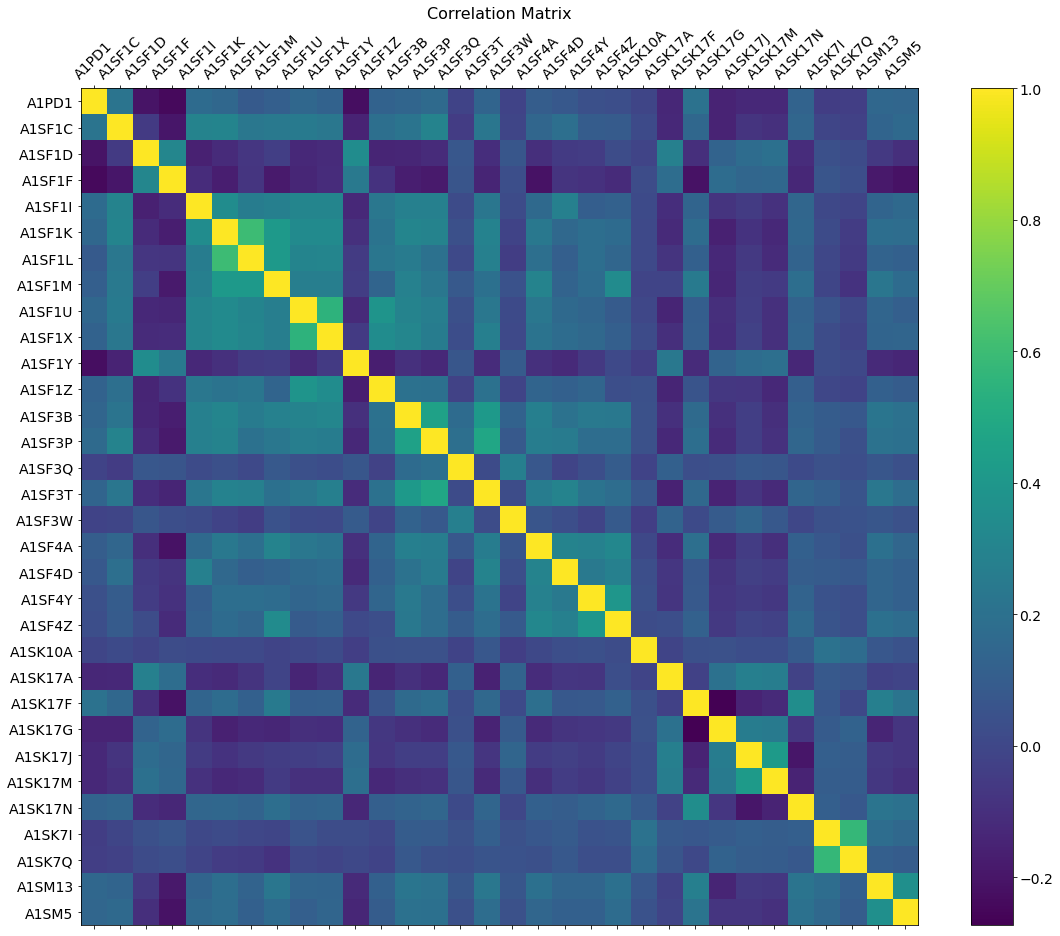

In [13]:
corr_plot_variables(merged_data , features)

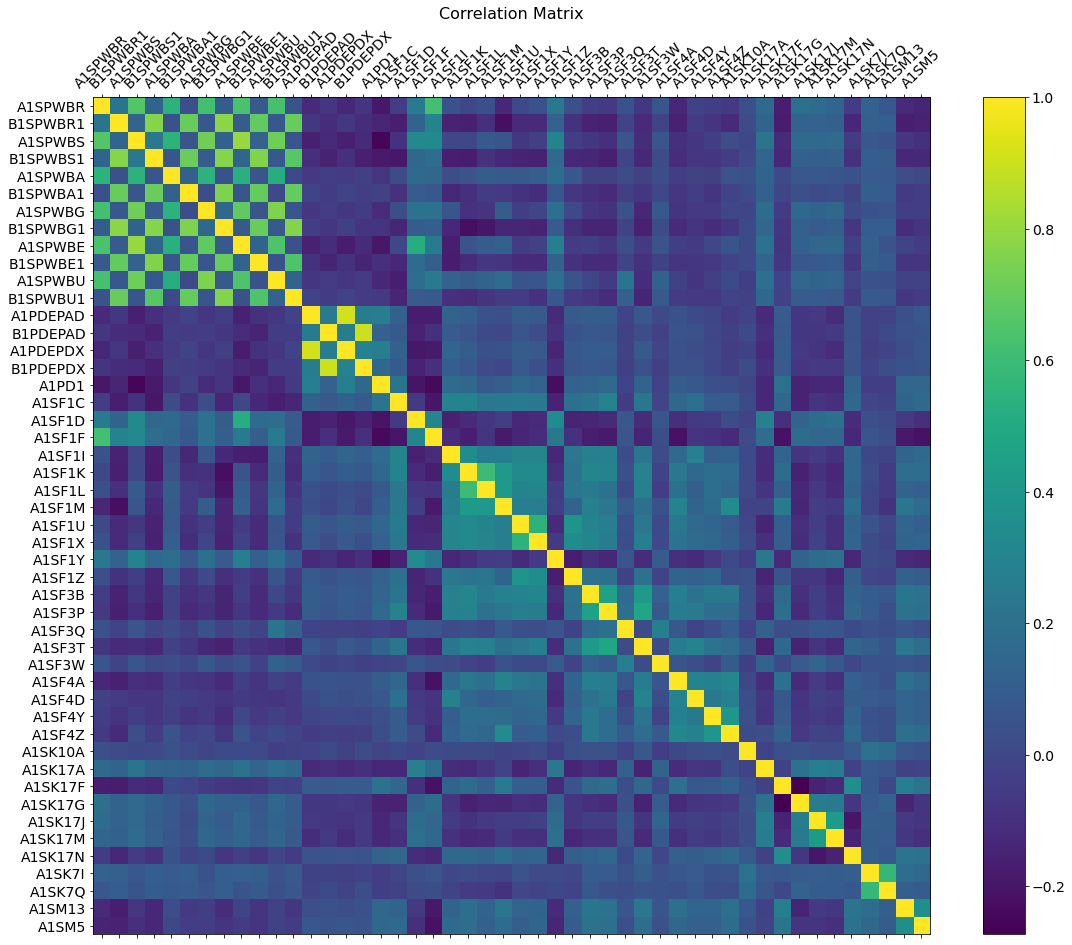

In [14]:
corr_plot_variables(merged_data , variables)

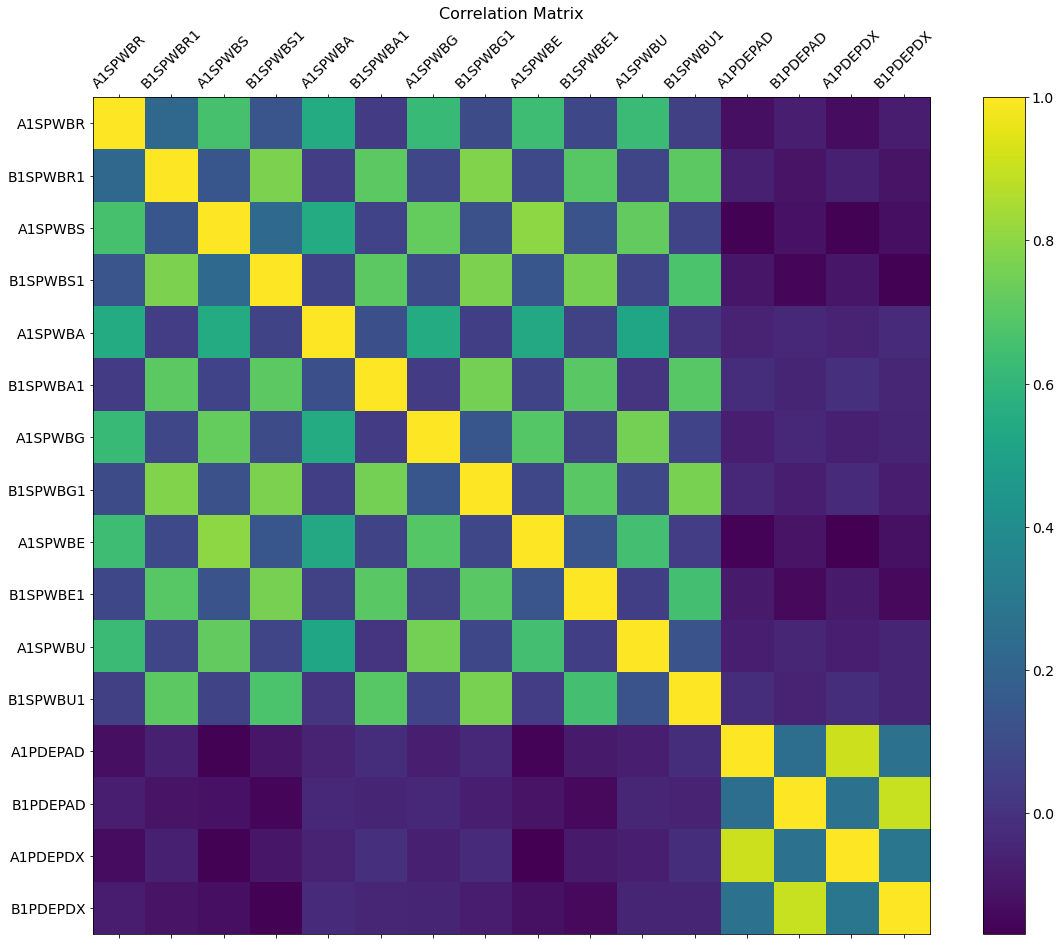

In [15]:
corr_plot_variables(merged_data , targets)

In [20]:
import math
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle


subjects_depressed_test = merged_data[(merged_data['A1PDEPDX'] == 1) | (merged_data['A1PDEPAD'] == 1)] # all the depressed subjects from the first interval
subjects_normal_train = merged_data[(merged_data['A1PDEPDX'] == 0) & (merged_data['A1PDEPAD'] == 0)] # all non-depressed subjects from the second interval 
depressed_ratio = (len(subjects_depressed_test) / len(subjects_normal_train)) # the subject depression ratio 
print("depressed ratio : " , depressed_ratio)

subjects_depressed_test_x = subjects_depressed_test[features] 
subjects_depressed_test_y = subjects_depressed_test[well_being_target_future]

train_x , subjects_normal_test_x , train_y , subjects_normal_test_y = train_test_split(
    subjects_normal_train[features], subjects_normal_train[well_being_target_future], test_size= (0.26 - depressed_ratio) , random_state=42)

# here we use the test dataset as the rest of the non-depressed partcipants from the train_test_split , and all the depressed subjects
test_x = subjects_normal_test_x.append(subjects_depressed_test_x, ignore_index=True) 
test_y = subjects_normal_test_y.append(subjects_depressed_test_y, ignore_index=True)

print("train x size : " , len(train_x))
print("train y size : " , len(train_y))
print("test x size : " , len(test_x))
print("test y size : " , len(test_y))


# here we shuffle the test set, it doesn't matter tho as it is just used for testing
X_sparse = coo_matrix(test_x)
test_x, X_sparse, test_y = shuffle(test_x, X_sparse, test_y, random_state=0) 

depressed ratio :  0.13554913294797688
train x size :  3029
train y size :  3029
test x size :  900
test y size :  900


C:\Users\Ultriva\AppData\Local\Temp\ipykernel_7392\2009214033.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_x = subjects_normal_test_x.append(subjects_depressed_test_x, ignore_index=True)
C:\Users\Ultriva\AppData\Local\Temp\ipykernel_7392\2009214033.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_y = subjects_normal_test_y.append(subjects_depressed_test_y, ignore_index=True)


In [21]:
import tensorflow as tf
''' 
model architecture 4 hidden layers all with 400 neurons applying regularization before applying the activation function 
the activation function is leaky relu with alpha value of 0.3
after the activation layer there is a dropoout layer with dropping probability of 0.3
number of features in study are 32
the number of outputs is the Ryff 6 dimensions factors related to well-being used in cognitive behavioral therapy (CBT) 
'''
def create_model():
    drop_prob = 0.30
    reg_val = 1e-7
    
    model = Sequential()
    model.add(tf.keras.Input(shape=(32,)))
    
    model.add(tf.keras.layers.Dense(400 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.3 ))
    model.add(Dropout(drop_prob))
    
    model.add(tf.keras.layers.Dense(400 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.3 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(Dropout(drop_prob))
    
    model.add(tf.keras.layers.Dense(400 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.3 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(Dropout(drop_prob))
    
    model.add(tf.keras.layers.Dense(400 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.3 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(Dropout(drop_prob))
    
    model.add(Dense(6))
    
    
    return model

In [22]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               13200     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 400)               0         
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               1

In [23]:
adam = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) # define model optimizer
model.compile(optimizer=adam, loss="mae") # , metrics=['accuracy'] # apply model optimizer to the defined model on a mean absoulte error loss function 

In [24]:
import datetime
early_stop = EarlyStopping(monitor='val_loss', patience=100,verbose=1, mode='min') # apply early stopping mechanism 
checkpoint = ModelCheckpoint('checkpoints_future_wellbeing/'+'model'+'-{epoch:02d}-{val_loss:.4f}',  monitor='val_loss'
                             ,verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto') # save the model artifacts if the validation error decreased

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) 

In [25]:
gpu_devices = tf.config.list_physical_devices('GPU')
print(gpu_devices)
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
print(is_cuda_gpu_available)
if gpu_devices:
    details = tf.config.experimental.get_device_details(gpu_devices[0])
    details.get('device_name', 'Unknown GPU')
print(details)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
{'device_name': 'NVIDIA GeForce GTX 1650', 'compute_capability': (7, 5)}


In [ ]:
# model trainig step
model.fit(
        train_x,
        train_y,
        batch_size=64,
        epochs=1000,
        verbose=1,
        callbacks=[early_stop,checkpoint,tensorboard_callback],
        validation_split=0.2,
        shuffle = True
    )

In [ ]:
model.evaluate(test_x, test_y, batch_size=64)

In [26]:
model_1 = load_model('final models future wellbeing/model-35-2.7160')
model_2 = load_model('final models future wellbeing/model-239-2.6257')
model_3 = load_model('final models future wellbeing/model-337-2.6285')

In [27]:
model_1.evaluate(test_x, test_y, batch_size=64)

15/15 [==============================] - 1s 6ms/step - loss: 2.9591


2.9591121673583984

In [28]:
model_2.evaluate(test_x, test_y, batch_size=64)

15/15 [==============================] - 0s 6ms/step - loss: 2.9316


2.9316253662109375

In [29]:
model_3.evaluate(test_x, test_y, batch_size=64)

15/15 [==============================] - 0s 6ms/step - loss: 2.9309


2.9308829307556152

In [30]:
data = train_x.values
data.shape

(3029, 32)

In [32]:
from minisom import MiniSom 
# apply self organizing maps with MIDUS1 first interval data with the selected 32 features with the parameters defined in 
# Optimizing future well-being with artificial intelligence: self-organizing maps (SOMs) for the identification of islands of emotional stability paper
som = MiniSom(25, 25, 32, sigma=1.8,activation_distance = 'euclidean',
              learning_rate=0.4 , neighborhood_function='gaussian' , random_seed=10)
som.train(data, 200000, verbose=True)

 [ 10 / 10 ] 100% - 0:00:00 left 
 quantization error: 1.0715274295631845


In [ ]:

with open('som.p', 'wb') as outfile:
    pickle.dump(som, outfile)

In [40]:
with open('som.p', 'rb') as infile:
    som = pickle.load(infile)

In [41]:
data_test_x = subjects_depressed_test[features].values
newx = np.array([som.winner(point) for point in data_test_x])

In [42]:
newBoard = np.zeros(shape = (25,25))
for point in newx:
    newBoard[point[0] - 1][point[1] - 1] += 1 
normalized_board = (newBoard - np.min(newBoard))/np.ptp(newBoard)

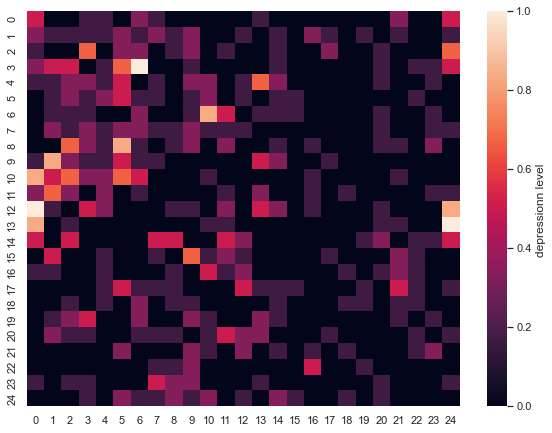

In [43]:
sns.set(rc={'figure.figsize':(9.7,7.27)})
ax = sns.heatmap(normalized_board ,  
                 cbar_kws={'label': 'depressionn level '})

plt.savefig('output.png')